In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
standard = pd.read_csv('standardbatting.csv', float_precision = 'round_trip')
standard

,Year,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,...,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,Playoff
0,2001,Anaheim Angels,38,27.9,4.27,162,6226,5551,691,1447,...,0.732,91,2248,109,77,46,53,34,1203,0
1,2001,Arizona Diamondbacks,47,31.9,5.05,162,6349,5595,818,1494,...,0.783,94,2472,105,57,71,36,73,1183,1
2,2001,Atlanta Braves,47,30.4,4.50,162,6152,5498,729,1432,...,0.736,87,2265,132,45,64,52,51,1095,1
3,2001,Baltimore Orioles,46,30.2,4.24,162,6151,5472,687,1359,...,0.699,88,2077,121,77,38,49,26,1106,0
4,2001,Boston Red Sox,48,30.0,4.80,161,6264,5605,772,1493,...,0.773,101,2461,132,70,28,41,50,1161,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,2021,Tampa Bay Rays,61,27.7,5.29,162,6213,5507,857,1336,...,0.750,110,2362,75,72,6,41,27,1085,1
647,2021,Texas Rangers,54,26.8,3.86,162,5943,5405,625,1254,...,0.670,83,2028,113,58,16,31,10,1007,0
648,2021,Toronto Blue Jays,62,26.8,5.22,162,6070,5476,846,1455,...,0.797,113,2552,112,51,10,35,14,1056,0
649,2021,Washington Nationals,60,28.7,4.47,162,6113,5385,724,1388,...,0.754,108,2246,158,84,38,31,43,1185,0


In [5]:
standard.head()

,Year,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,...,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,Playoff
0,2001,Anaheim Angels,38,27.9,4.27,162,6226,5551,691,1447,...,0.732,91,2248,109,77,46,53,34,1203,0
1,2001,Arizona Diamondbacks,47,31.9,5.05,162,6349,5595,818,1494,...,0.783,94,2472,105,57,71,36,73,1183,1
2,2001,Atlanta Braves,47,30.4,4.50,162,6152,5498,729,1432,...,0.736,87,2265,132,45,64,52,51,1095,1
3,2001,Baltimore Orioles,46,30.2,4.24,162,6151,5472,687,1359,...,0.699,88,2077,121,77,38,49,26,1106,0
4,2001,Boston Red Sox,48,30.0,4.80,161,6264,5605,772,1493,...,0.773,101,2461,132,70,28,41,50,1161,0


In [6]:
standard.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     651 non-null    int64  
 1   Tm       651 non-null    object 
 2   #Bat     651 non-null    int64  
 3   BatAge   651 non-null    float64
 4   R/G      651 non-null    float64
 5   G        651 non-null    int64  
 6   PA       651 non-null    int64  
 7   AB       651 non-null    int64  
 8   R        651 non-null    int64  
 9   H        651 non-null    int64  
 10  2B       651 non-null    int64  
 11  3B       651 non-null    int64  
 12  HR       651 non-null    int64  
 13  RBI      651 non-null    int64  
 14  SB       651 non-null    int64  
 15  CS       651 non-null    int64  
 16  BB       651 non-null    int64  
 17  SO       651 non-null    int64  
 18  BA       651 non-null    float64
 19  OBP      651 non-null    float64
 20  SLG      651 non-null    float64
 21  OPS      651 non

In [7]:
# remove data from 2020
print(standard.shape)
standard = standard.loc[standard.Year != 2020, ]
print(standard.shape) # rows went from 660 to 630

(651, 31)
(620, 31)


In [8]:
import matplotlib.pyplot as plt


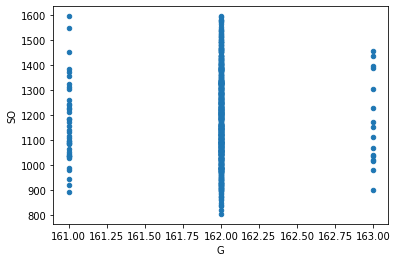

In [9]:
standard.plot.scatter('G', 'SO') # Home runs vs runs batted in
plt.show()

In [10]:
# ideas of graphs to make for Exploratory Data Analysis
# 1. 
# 2. 

### Visualization 1: Line Plot

[Text(0.5, 1.0, 'Runs scored per game 2000-2020')]

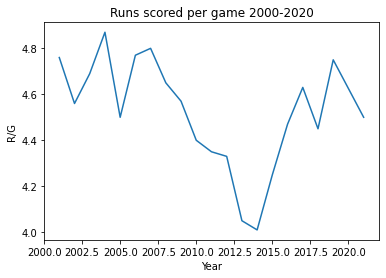

In [11]:
#Average runs scored per game grouped by Year
runs = standard.groupby('Year')['R/G'].median()
sns.lineplot(data = runs).set(title = "Runs scored per game 2000-2020")
#Average runs scored per game goes up and down depending on the year

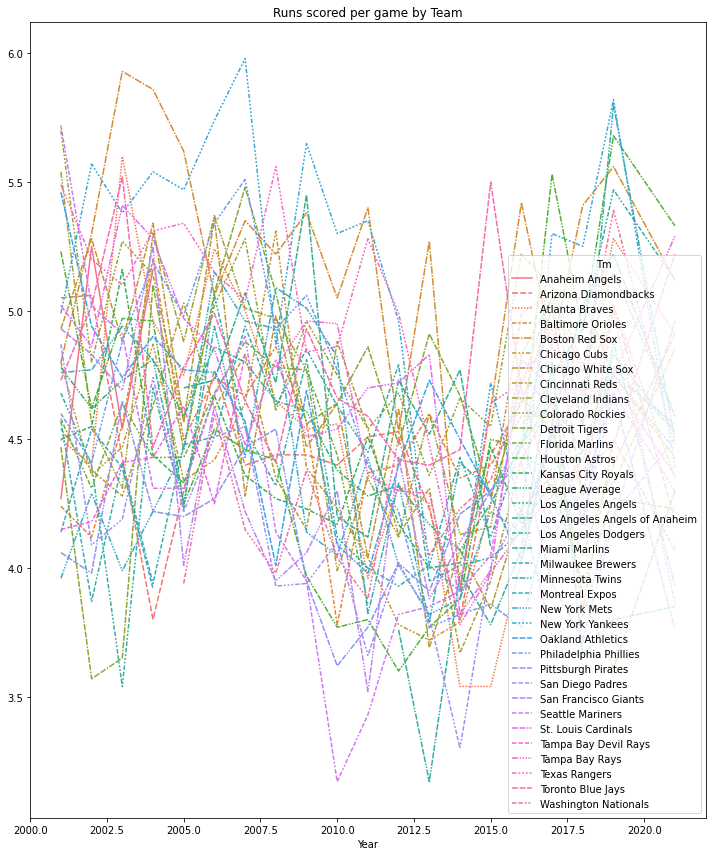

In [17]:
runsscore = standard.pivot("Year", "Tm", "R/G")

fig = plt.figure(figsize = (10,12))
sns.lineplot(data = runsscore).set(title = "Runs scored per game by Team")
fig.tight_layout()

### Visualization 2: sns displot

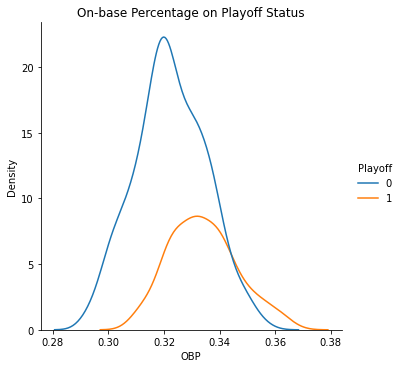

In [18]:
sns.displot(data = standard, x = 'OBP', hue = 'Playoff', kind = 'kde')
plt.title('On-base Percentage on Playoff Status')
plt.show()

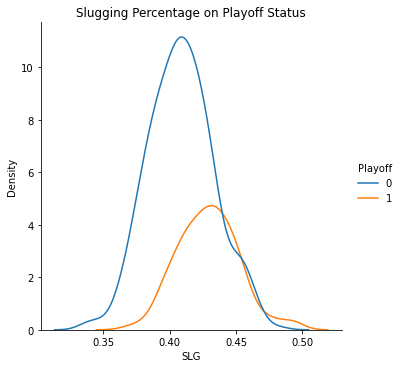

In [19]:
sns.displot(data = standard, x = 'SLG', hue = 'Playoff', kind = 'kde')
plt.title('Slugging Percentage on Playoff Status')
plt.show()

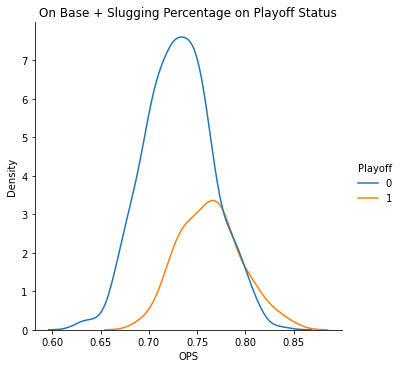

In [20]:
sns.displot(data = standard, x = 'OPS', hue = 'Playoff', kind = 'kde')
plt.title('On Base + Slugging Percentage on Playoff Status')
plt.show()

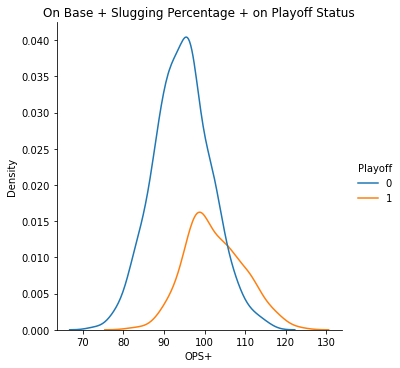

In [21]:
sns.displot(data = standard, x = 'OPS+', hue = 'Playoff', kind = 'kde')
plt.title('On Base + Slugging Percentage + on Playoff Status')
plt.show()

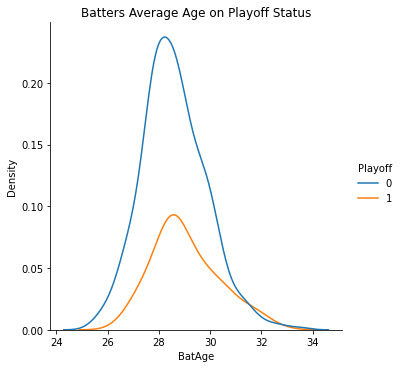

In [22]:
sns.displot(data = standard, x = 'BatAge', hue = 'Playoff', kind = 'kde')
plt.title('Batters Average Age on Playoff Status')
plt.show()

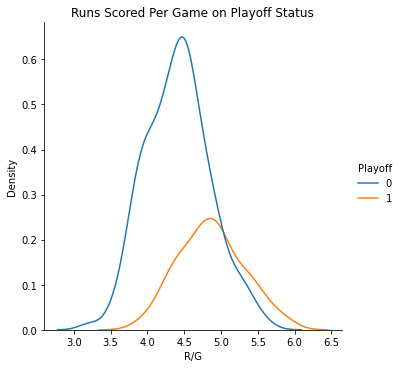

In [23]:
sns.displot(data = standard, x = 'R/G', hue = 'Playoff', kind = 'kde')
plt.title('Runs Scored Per Game on Playoff Status')
plt.show()

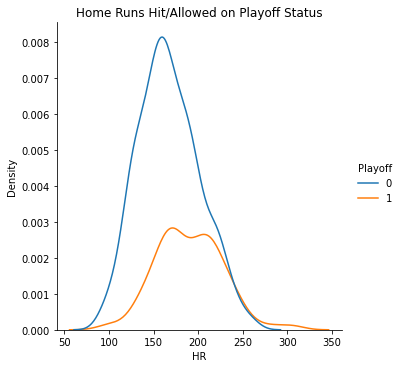

In [24]:
sns.displot(data = standard, x = 'HR', hue = 'Playoff', kind = 'kde')
plt.title('Home Runs Hit/Allowed on Playoff Status')
plt.show()

### Visualization 3: sns jointplot

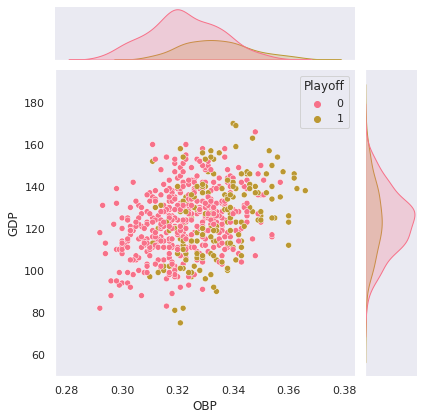

In [25]:
sns.set_theme(style = 'dark', palette = 'husl')
sns.jointplot(data = standard, x = 'OBP', y = 'GDP', hue = 'Playoff')
plt.show()

### Visualization 4: K% or Strikeout Rate

Strikeout rate = strikeout / plates 


In [26]:
standard['K%'] = standard['SO']/standard['PA']
standard

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,...,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,Playoff,K%
0,2001,Anaheim Angels,38,27.9,4.27,162,6226,5551,691,1447,...,91,2248,109,77,46,53,34,1203,0,0.160777
1,2001,Arizona Diamondbacks,47,31.9,5.05,162,6349,5595,818,1494,...,94,2472,105,57,71,36,73,1183,1,0.165695
2,2001,Atlanta Braves,47,30.4,4.50,162,6152,5498,729,1432,...,87,2265,132,45,64,52,51,1095,1,0.168888
3,2001,Baltimore Orioles,46,30.2,4.24,162,6151,5472,687,1359,...,88,2077,121,77,38,49,26,1106,0,0.160787
4,2001,Boston Red Sox,48,30.0,4.80,161,6264,5605,772,1493,...,101,2461,132,70,28,41,50,1161,0,0.180556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,2021,Tampa Bay Rays,61,27.7,5.29,162,6213,5507,857,1336,...,110,2362,75,72,6,41,27,1085,1,0.248189
647,2021,Texas Rangers,54,26.8,3.86,162,5943,5405,625,1254,...,83,2028,113,58,16,31,10,1007,0,0.232374
648,2021,Toronto Blue Jays,62,26.8,5.22,162,6070,5476,846,1455,...,113,2552,112,51,10,35,14,1056,0,0.200659
649,2021,Washington Nationals,60,28.7,4.47,162,6113,5385,724,1388,...,108,2246,158,84,38,31,43,1185,0,0.213152


[Text(0.5, 1.0, 'K% between Playoff teams and Non-Playoff Teams')]

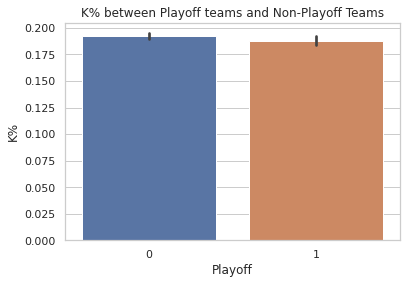

In [27]:
sns.set_theme(style="whitegrid")
sns.barplot(x="Playoff", y="K%", data=standard).set(title='K% between Playoff teams and Non-Playoff Teams')
